In [1]:
%config Completer.use_jedi = False

# Load data

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [3]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,
                                                                      train_target,
                                                                      test_size=0.2,
                                                                      random_state=42)

In [4]:
print("train data shape: {}".format(train_scaled.shape))
print("val data shape: {}".format(val_scaled.shape))
print("test data shape: {}".format(test_scaled.shape))

train data shape: (48000, 28, 28, 1)
val data shape: (12000, 28, 28, 1)
test data shape: (10000, 28, 28, 1)


# Build a CNN model

In [5]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

In [7]:
from tensorflow.keras.utils import plot_model

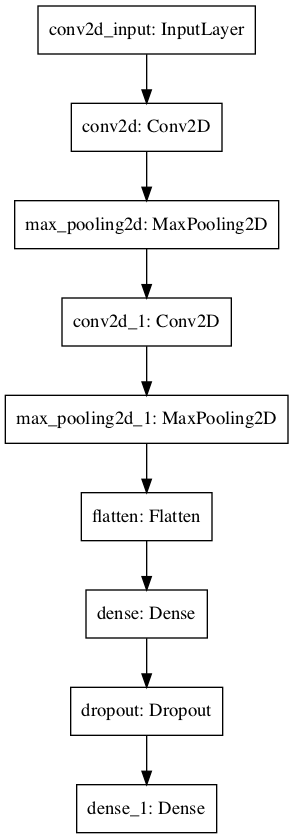

In [8]:
plot_model(model)

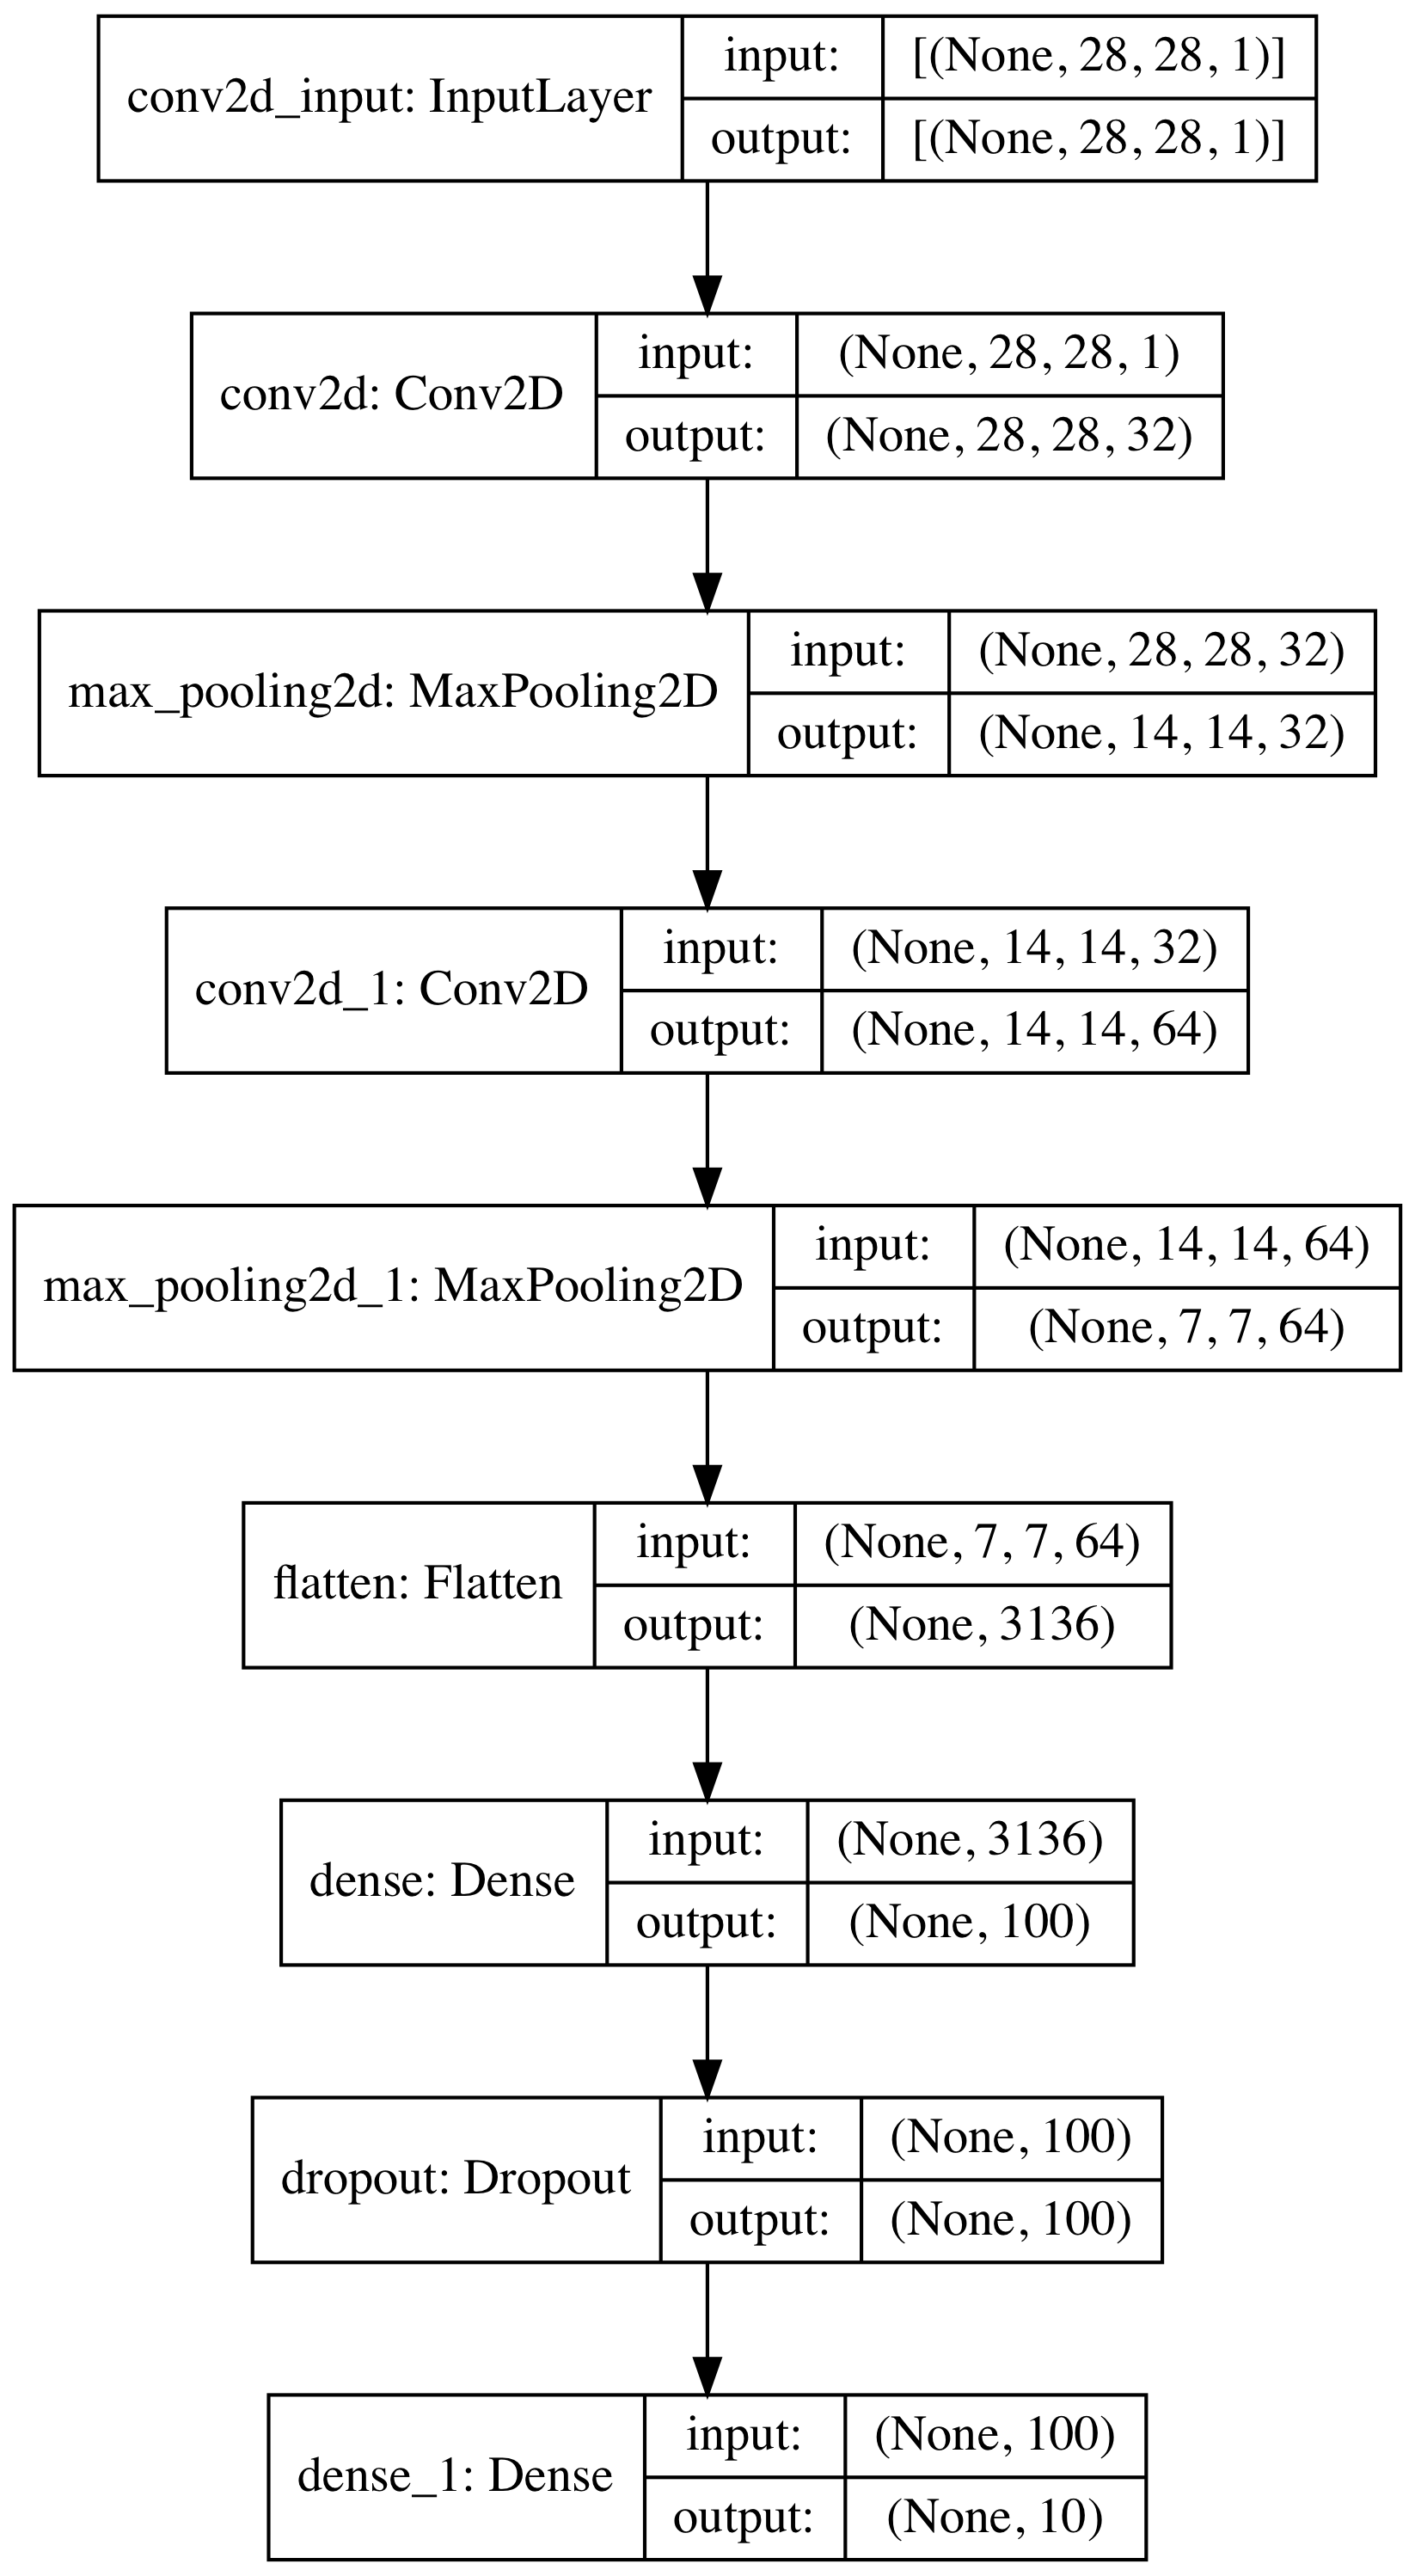

In [9]:
plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

# Train a model

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled,
                    train_target,
                    epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 35s 23ms/step - loss: 0.5297 - accuracy: 0.8125 - val_loss: 0.3191 - val_accuracy: 0.8838
Epoch 2/20
1500/1500 [==============================] - 39s 26ms/step - loss: 0.3467 - accuracy: 0.8763 - val_loss: 0.2841 - val_accuracy: 0.8978
Epoch 3/20
1500/1500 [==============================] - 43s 28ms/step - loss: 0.2974 - accuracy: 0.8919 - val_loss: 0.2550 - val_accuracy: 0.9042
Epoch 4/20
1500/1500 [==============================] - 43s 29ms/step - loss: 0.2682 - accuracy: 0.9022 - val_loss: 0.2365 - val_accuracy: 0.9130
Epoch 5/20
1500/1500 [==============================] - 44s 29ms/step - loss: 0.2429 - accuracy: 0.9111 - val_loss: 0.2384 - val_accuracy: 0.9107
Epoch 6/20
1500/1500 [==============================] - 44s 29ms/step - loss: 0.2189 - accuracy: 0.9177 - val_loss: 0.2415 - val_accuracy: 0.9125


# Visualize result

In [11]:
import matplotlib.pyplot as plt

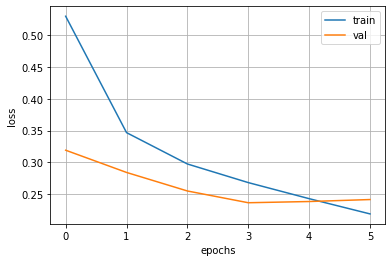

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.grid()
plt.show()

# Evaluate a model

In [13]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.2365 - accuracy: 0.9130


[0.23650561273097992, 0.9129999876022339]

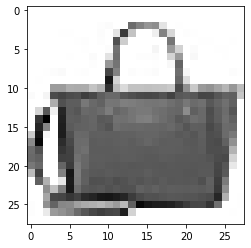

In [15]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [18]:
import numpy as np

In [22]:
pred = model.predict(val_scaled[0:1])
pred

array([[4.9534362e-13, 1.5348715e-17, 2.0529482e-14, 2.4377212e-15,
        2.3034168e-13, 2.4979151e-12, 1.8641172e-11, 2.3074031e-11,
        1.0000000e+00, 1.9914964e-12]], dtype=float32)

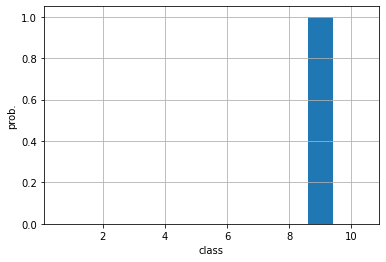

In [25]:
plt.bar(range(1, 11), pred[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.grid()
plt.show()

In [27]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
classes[np.argmax(pred)]

'가방'

In [28]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 6ms/step - loss: 0.2684 - accuracy: 0.9044


[0.2684228718280792, 0.9043999910354614]